# 이미지 인식 - CNN
## MNIST 사례


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
seed =  0

np.random.seed(seed)
tf.random.set_seed(seed)

In [45]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
#X_train = X_train.reshape(-1, 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
#X_test = X_test.reshape(-1, 28,28,1).astype('float32')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


In [46]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)              

In [47]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [48]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [49]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose = 1 , save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

In [32]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2853 - accuracy: 0.9123 - val_loss: 0.0575 - val_accuracy: 0.9802

Epoch 00001: val_loss improved from inf to 0.05746, saving model to ./model/mnist-cnn-01-0.0575.hdf5
Epoch 2/30
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0891 - accuracy: 0.9732 - val_loss: 0.0384 - val_accuracy: 0.9870

Epoch 00002: val_loss improved from 0.05746 to 0.03843, saving model to ./model/mnist-cnn-02-0.0384.hdf5
Epoch 3/30
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0346 - val_accuracy: 0.9889

Epoch 00003: val_loss improved from 0.03843 to 0.03462, saving model to ./model/mnist-cnn-03-0.0346.hdf5
Epoch 4/30
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0382 - val_accuracy: 0.9886

Epoch 00004: val_loss did not improve from 0.03

In [42]:
from tensorflow.keras.models import load_model

model = load_model('model/mnist-cnn-18-0.9926.hdf5')

NameError: name 'model' is not defined

In [41]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))

NameError: name 'model' is not defined

In [35]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

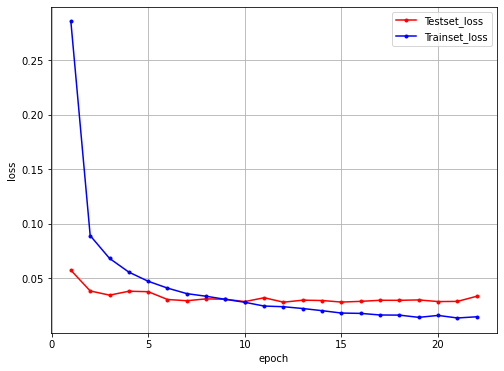

In [36]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()